**1**. (100 points)

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia. Your final solution should be similar to the video `forest_fire.mp4` in the homework folder.

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [1]:
from IPython.display import Video

Video("forest_fire.mp4")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
np.random.seed(123)

In [3]:
EMPTY, TREE, BURN = 0, 1, 2

In [4]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [5]:
%%time

# Your code to generate the `sim` array here.
sim_border = np.zeros((steps, n + 2, n + 2))

# simulation
for step in range(1, steps):
    
    # Transformation matrix
    sim_border[step] = sim_border[step - 1]
    trans = np.zeros((n, n))
    
    # Index for empty, tree, burn
    idx_empty = np.where(sim_border[step - 1][1:-1, 1:-1] == 0)
    idx_tree = np.where(sim_border[step - 1][1:-1, 1:-1] == 1)
    idx_burn = np.where(sim_border[step - 1][1:-1, 1:-1] == 2)
    
    # burn -> empty
    trans[idx_burn] = 1
    
    # empty -> tree
    trans[idx_empty] = np.random.random(len(idx_empty[0])) <= p
    
    # tree -> burn
    # possible burned tree
    trans[idx_tree] = np.random.random(len(idx_tree[0])) <= f
    # neighbor burned tree
    is_burned = sim_border[step - 1] == 2
    is_burned_neighbor = (is_burned[:-2, 1:-1] + is_burned[2:, 1:-1] 
                            + is_burned[1:-1, :-2] + is_burned[1:-1, 2:]) >= 1
    is_burned_neighbor[idx_empty] = 0
    is_burned_neighbor[idx_burn] = 0
    trans[is_burned_neighbor] = 1

    # next step
    sim_border[step][1:-1, 1:-1] = (sim_border[step - 1][1:-1, 1:-1] + trans) % 3

# remove border
sim = sim_border[:, 1:-1, 1:-1]


CPU times: user 703 ms, sys: 46.9 ms, total: 750 ms
Wall time: 738 ms


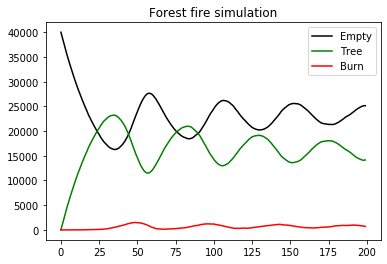

In [6]:
# Your code to make the first plot here

empty_cnt = np.count_nonzero(sim == 0, axis = (1,2))
tree_cnt = np.count_nonzero(sim == 1, axis = (1,2))
burn_cnt = np.count_nonzero(sim == 2, axis = (1,2))
x = range(steps)

plt.plot(x, empty_cnt, color = 'black', label = 'Empty')
plt.plot(x, tree_cnt, color = 'green', label = 'Tree')
plt.plot(x, burn_cnt, color = 'red', label = 'Burn')
plt.legend(loc = 'upper right', fontsize = 10)
plt.title('Forest fire simulation')
pass

# Check movie

If your `sim` array is correct, the animation will play upon execution. It takes a bit of time (< 1 minute) to genreate the animation and render to HTML.

In [7]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [8]:
%%time

HTML(ani.to_jshtml())

CPU times: user 17.1 s, sys: 609 ms, total: 17.8 s
Wall time: 17.8 s


To write to file if you have ffmpeg instaled

```python 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)
```